In [ ]:
import pandas as pd

weather = pd.read_csv("/content/Mumbai climate daily 91 to 24.csv", index_col="DATE")
weather

,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
1/1/2000,IN012070800,"BOMBAY SANTACRUZ, IN",0.00,78,93.0,NaN
1/2/2000,IN012070800,"BOMBAY SANTACRUZ, IN",0.00,79,92.0,65.0
1/3/2000,IN012070800,"BOMBAY SANTACRUZ, IN",0.00,79,92.0,NaN
1/4/2000,IN012070800,"BOMBAY SANTACRUZ, IN",0.00,79,91.0,63.0
1/5/2000,IN012070800,"BOMBAY SANTACRUZ, IN",0.00,79,91.0,64.0
...,...,...,...,...,...,...
10/10/2024,IN012070800,"BOMBAY SANTACRUZ, IN",0.39,82,NaN,NaN
10/11/2024,IN012070800,"BOMBAY SANTACRUZ, IN",1.06,84,NaN,75.0
10/12/2024,IN012070800,"BOMBAY SANTACRUZ, IN",1.22,84,NaN,77.0


In [ ]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

,0
STATION,0.000000
NAME,0.000000
PRCP,0.583462
TAVG,0.000000
TMAX,0.464515
TMIN,0.225625


In [ ]:
valid_columns = weather.columns[null_pct < .05]

In [ ]:
valid_columns

Index(['STATION', 'NAME', 'TAVG'], dtype='object')

In [ ]:
weather = weather[valid_columns].copy()

In [ ]:
weather.columns = weather.columns.str.lower()

In [ ]:
weather

,station,name,tavg
DATE,,,
1/1/2000,IN012070800,"BOMBAY SANTACRUZ, IN",78
1/2/2000,IN012070800,"BOMBAY SANTACRUZ, IN",79
1/3/2000,IN012070800,"BOMBAY SANTACRUZ, IN",79
1/4/2000,IN012070800,"BOMBAY SANTACRUZ, IN",79
1/5/2000,IN012070800,"BOMBAY SANTACRUZ, IN",79
...,...,...,...
10/10/2024,IN012070800,"BOMBAY SANTACRUZ, IN",82
10/11/2024,IN012070800,"BOMBAY SANTACRUZ, IN",84
10/12/2024,IN012070800,"BOMBAY SANTACRUZ, IN",84


In [ ]:
weather = weather.ffill()
weather.apply(pd.isnull).sum()

,0
station,0
name,0
tavg,0


In [ ]:
weather.apply(lambda x: (x == 9999).sum())
weather.dtypes

,0
station,object
name,object
tavg,int64


In [ ]:
weather.index

Index(['1/1/2000', '1/2/2000', '1/3/2000', '1/4/2000', '1/5/2000', '1/6/2000',
       '1/7/2000', '1/8/2000', '1/9/2000', '1/10/2000',
       ...
       '10/5/2024', '10/6/2024', '10/7/2024', '10/8/2024', '10/9/2024',
       '10/10/2024', '10/11/2024', '10/12/2024', '10/13/2024', '10/14/2024'],
      dtype='object', name='DATE', length=9046)

In [ ]:
weather.index = pd.to_datetime(weather.index)
weather.index.year.value_counts().sort_index()

,count
DATE,
2000,366
2001,365
2002,365
2003,365
2004,366
2005,365
2006,365
2007,365
2008,366


In [ ]:
weather["target"] = weather.shift(-1)["tavg"]
weather

,station,name,tavg,target
DATE,,,,
2000-01-01,IN012070800,"BOMBAY SANTACRUZ, IN",78,79.0
2000-01-02,IN012070800,"BOMBAY SANTACRUZ, IN",79,79.0
2000-01-03,IN012070800,"BOMBAY SANTACRUZ, IN",79,79.0
2000-01-04,IN012070800,"BOMBAY SANTACRUZ, IN",79,79.0
2000-01-05,IN012070800,"BOMBAY SANTACRUZ, IN",79,78.0
...,...,...,...,...
2024-10-10,IN012070800,"BOMBAY SANTACRUZ, IN",82,84.0
2024-10-11,IN012070800,"BOMBAY SANTACRUZ, IN",84,84.0
2024-10-12,IN012070800,"BOMBAY SANTACRUZ, IN",84,83.0


In [ ]:
weather = weather.ffill()
weather

,station,name,tavg,target
DATE,,,,
2000-01-01,IN012070800,"BOMBAY SANTACRUZ, IN",78,79.0
2000-01-02,IN012070800,"BOMBAY SANTACRUZ, IN",79,79.0
2000-01-03,IN012070800,"BOMBAY SANTACRUZ, IN",79,79.0
2000-01-04,IN012070800,"BOMBAY SANTACRUZ, IN",79,79.0
2000-01-05,IN012070800,"BOMBAY SANTACRUZ, IN",79,78.0
...,...,...,...,...
2024-10-10,IN012070800,"BOMBAY SANTACRUZ, IN",82,84.0
2024-10-11,IN012070800,"BOMBAY SANTACRUZ, IN",84,84.0
2024-10-12,IN012070800,"BOMBAY SANTACRUZ, IN",84,83.0


In [ ]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=.1)
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]
def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []

    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]

        model.fit(train[predictors], train["target"])

        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()

        all_predictions.append(combined)
    return pd.concat(all_predictions)
predictions = backtest(weather, rr, predictors)
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(predictions["actual"], predictions["prediction"])

1.2079515845033084

In [ ]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
2021-11-30,71.0,83.835180,12.835180
2021-05-16,80.0,90.152709,10.152709
2024-04-30,81.0,91.062310,10.062310
2018-06-22,78.0,86.531606,8.531606
2010-10-10,76.0,83.781202,7.781202
...,...,...,...
2015-12-14,82.0,81.998359,0.001641
2017-03-08,82.0,82.000989,0.000989
2016-08-02,82.0,82.000785,0.000785


In [ ]:
pd.Series(rr.coef_, index=predictors)

,0
tavg,0.90247


In [ ]:
def pct_diff(old, new):
    return (new - old) / old

def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather

rolling_horizons = [3, 14]
for horizon in rolling_horizons:
    for col in ["tavg"]:
        weather = compute_rolling(weather, horizon, col)
def expand_mean(df):
    return df.expanding(1).mean()

for col in ["tavg"]:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)
weather = weather.iloc[14:,:]
weather = weather.fillna(0)
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]
predictions = backtest(weather, rr, predictors)
mean_absolute_error(predictions["actual"], predictions["prediction"])

1.159695878928443

In [ ]:
mean_squared_error(predictions["actual"], predictions["prediction"])

2.4798046848652207

In [ ]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
2021-11-30,71.0,84.017285,13.017285
2021-05-16,80.0,90.071144,10.071144
2024-04-30,81.0,90.432278,9.432278
2018-06-22,78.0,86.472347,8.472347
2010-10-10,76.0,84.098979,8.098979
...,...,...,...
2011-04-20,84.0,84.001183,0.001183
2012-05-19,85.0,85.000723,0.000723
2011-09-26,82.0,81.999354,0.000646


In [ ]:
weather.loc["2024-03-07": "2024-03-17"]

,station,name,tavg,target,rolling_3_tavg,rolling_3_tavg_pct,rolling_14_tavg,rolling_14_tavg_pct,month_avg_tavg,day_avg_tavg
DATE,,,,,,,,,,
2024-03-07,IN012070800,"BOMBAY SANTACRUZ, IN",83,85.0,81.333333,0.020492,81.928571,0.013078,82.676431,81.36
2024-03-08,IN012070800,"BOMBAY SANTACRUZ, IN",85,85.0,83.000000,0.024096,82.357143,0.032090,82.679521,81.68
2024-03-09,IN012070800,"BOMBAY SANTACRUZ, IN",85,83.0,84.333333,0.007905,82.714286,0.027634,82.682603,82.12
2024-03-10,IN012070800,"BOMBAY SANTACRUZ, IN",83,85.0,84.333333,-0.015810,82.857143,0.001724,82.683024,82.08
2024-03-11,IN012070800,"BOMBAY SANTACRUZ, IN",85,86.0,84.333333,0.007905,82.928571,0.024978,82.686093,82.80
2024-03-12,IN012070800,"BOMBAY SANTACRUZ, IN",86,83.0,84.666667,0.015748,83.000000,0.036145,82.690476,83.32
2024-03-13,IN012070800,"BOMBAY SANTACRUZ, IN",83,81.0,84.666667,-0.019685,82.857143,0.001724,82.690885,82.56
2024-03-14,IN012070800,"BOMBAY SANTACRUZ, IN",81,80.0,83.333333,-0.028000,82.357143,-0.016479,82.688654,82.52
2024-03-15,IN012070800,"BOMBAY SANTACRUZ, IN",80,81.0,81.333333,-0.016393,82.000000,-0.024390,82.685112,83.04


<Axes: xlabel='diff'>

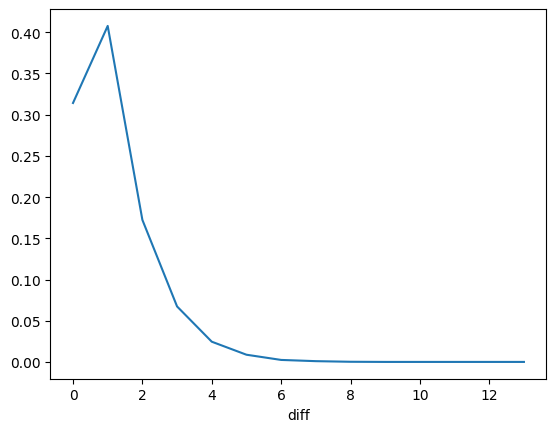

In [ ]:
(predictions["diff"].round().value_counts().sort_index() / predictions.shape[0]).plot()

In [ ]:
predictions

,actual,prediction,diff
DATE,,,
2010-01-12,75.0,78.781276,3.781276
2010-01-13,77.0,75.626087,1.373913
2010-01-14,82.0,77.352020,4.647980
2010-01-15,83.0,81.388986,1.611014
2010-01-16,81.0,82.061731,1.061731
...,...,...,...
2024-10-10,84.0,82.461792,1.538208
2024-10-11,84.0,84.405964,0.405964
2024-10-12,83.0,84.289452,1.289452
